Độ chính xác của mô hình Naive Bayes: 0.98
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



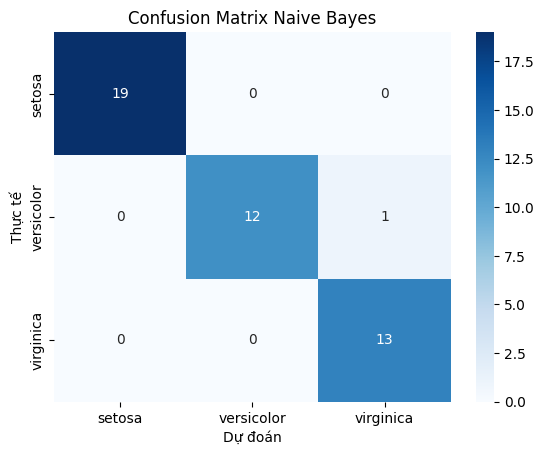

In [2]:
# 1. Import các thư viện cần thiết
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Tải bộ dữ liệu Iris
iris = load_iris()
X = iris.data  # Đặc trưng (features)
y = iris.target  # Nhãn (labels)

# 3. Kiểm tra và xử lý giá trị thiếu (nếu có)
# Bộ dữ liệu Iris không có giá trị thiếu, nhưng nếu có, ta có thể sử dụng SimpleImputer:
# imputer = SimpleImputer(strategy='mean')
# X = imputer.fit_transform(X)

# 4. Chuẩn hóa dữ liệu (nếu cần thiết)
# Mặc dù Naive Bayes không yêu cầu chuẩn hóa, nhưng đây là bước hữu ích cho các thuật toán khác
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 6. Khởi tạo và huấn luyện mô hình Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# 7. Dự đoán và đánh giá mô hình
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Độ chính xác của mô hình Naive Bayes: {accuracy:.2f}")
print("Báo cáo phân loại:\n", classification_report(y_test, y_pred))

# 8. Trực quan hóa Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

